In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler  # 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE,ADASYN

In [2]:
df = pd.read_csv('US_Heart_Patients (2).csv')

In [3]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [6]:
df.shape

(4240, 16)

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        
        print()
        print(df[column].value_counts())
        print()


Gender
Female    2414
Male      1818
Name: count, dtype: int64



In [8]:
list = ['education','cigsPerDay','currentSmoker']

In [9]:
cat=["education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]

In [10]:
for column in cat:
    if df[column].dtype != 'object':
        
        print()
        print(df[column].value_counts())
        print()


education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64


currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64



KeyError: 'BPMeds'

In [11]:
cat

['education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

In [12]:
num = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)    

In [13]:
cat

['education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'Gender']

In [14]:
num

['age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BP Meds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'tot cholesterol',
 'Systolic BP',
 'Diastolic BP',
 'BMI',
 'heartRate',
 'glucose',
 'Heart-Att']

In [15]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4130.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4237.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
BP Meds,4180.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4231.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4238.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4238.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0


In [16]:
round(df.isnull().sum() * 100/df.shape[0],2)

Gender             0.19
age                0.05
education          2.59
currentSmoker      0.07
cigsPerDay         0.73
BP Meds            1.42
prevalentStroke    0.21
prevalentHyp       0.05
diabetes           0.05
tot cholesterol    1.42
Systolic BP        0.09
Diastolic BP       0.12
BMI                0.57
heartRate          0.09
glucose            9.22
Heart-Att          0.00
dtype: float64

In [17]:
df.rename(columns = {"BP Meds": "BPMeds","tot cholesterol": "tot_cholesterol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace=True)


## Null Value Treatment

In [18]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BPMeds              60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot_cholesterol     60
Systolic_BP          4
Diastolic_BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [19]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode)

In [20]:
for column in cat:
    df[column] = df[column].fillna(df[column].mode)

In [21]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Gender
['Male', 'Female', <bound method Series.mode of 0         Male\n1...]
Categories (3, object): [<bound method Series.mode of 0         Male\n1..., 'Female', 'Male']
[2 1 0]


feature: education
[4.0, 2.0, 1.0, 3.0, <bound method Series.mode of 0       4.0\n1   ...]
Categories (5, object): [4.0, 2.0, 1.0, 3.0, <bound method Series.mode of 0       4.0\n1   ...]
[0 1 2 3 4]


feature: currentSmoker
[0.0, 1.0, <bound method Series.mode of 0       0.0\n1   ...]
Categories (3, object): [0.0, 1.0, <bound method Series.mode of 0       0.0\n1   ...]
[0 1 2]


feature: BPMeds
[0.0, 1.0, <bound method Series.mode of 0       0.0\n1   ...]
Categories (3, object): [0.0, 1.0, <bound method Series.mode of 0       0.0\n1   ...]
[0 1 2]


feature: prevalentStroke
[0.0, <bound method Series.mode of 0       0.0\n1   ..., 1.0]
Categories (3, object): [0.0, <bound method Series.mode of 0       0.0\n1   ..., 1.0]
[0 1 2]


feature: prevalentHyp
[0.0, 1.0, <bound method Series.mode of 0      

In [22]:
from sklearn.impute import KNNImputer

In [23]:
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df)
df = pd.DataFrame(data = df_imputed,columns=df.columns)

In [24]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

## Outlier Treatment

<AxesSubplot:>

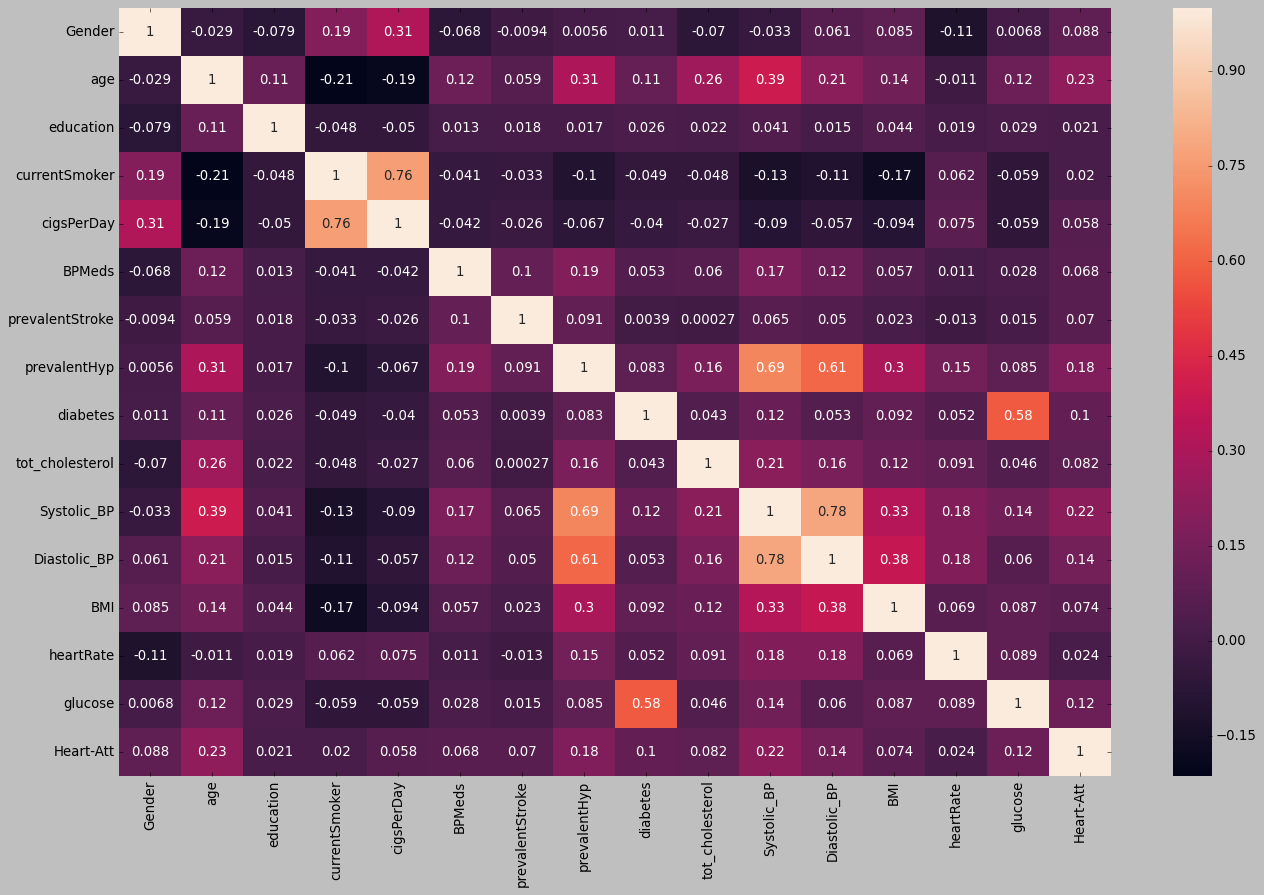

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

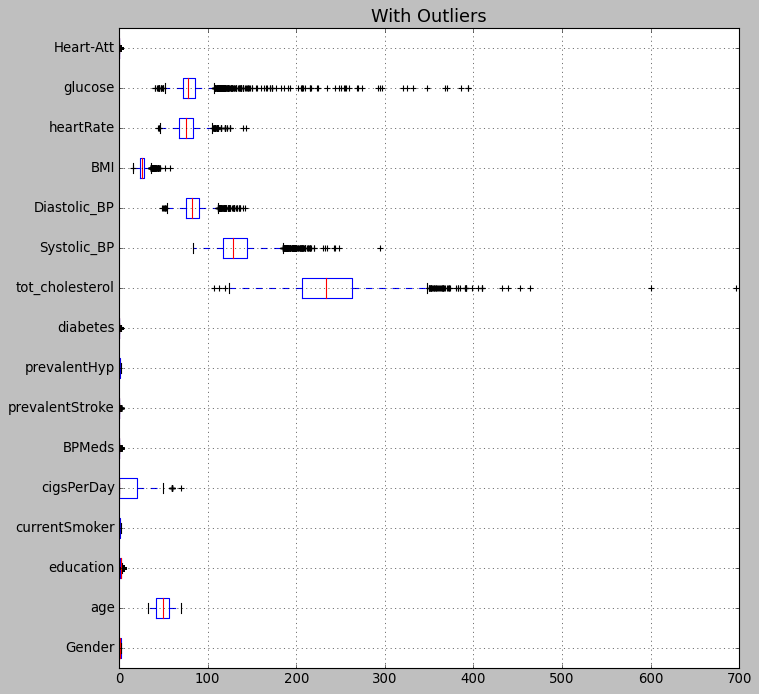

In [26]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
for column in df[cont].drop(['Heart-Att','glucose','tot_cholesterol'],axis=1).columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [29]:
def remove_outlier2(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[15,85])
    IQR=Q3-Q1
    lower_range2= Q1-(1.5 * IQR)
    upper_range2= Q3+(1.5 * IQR)
    return lower_range2, upper_range2

In [30]:
for column in df[cont].drop('Heart-Att',axis=1).columns:
    lr,ur=remove_outlier2(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

# Model Building

In [31]:
X = df.drop('Heart-Att',axis=1)
y = df['Heart-Att']

In [32]:
y.value_counts()

Heart-Att
0.0    3596
1.0     644
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [34]:
model_evaluation = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Train_Rec','Test_Rec','Train_Pre','Test_Pre'])

In [35]:
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre


### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [38]:
y_train_predict = NB.predict(X_train)

model_score = NB.score(X_train, y_train)

print(model_score)
print()
print(metrics.confusion_matrix(y_train, y_train_predict))
print()
print(metrics.classification_report(y_train, y_train_predict))

0.7933962264150943

[[2363  335]
 [ 322  160]]

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2698
         1.0       0.32      0.33      0.33       482

    accuracy                           0.79      3180
   macro avg       0.60      0.60      0.60      3180
weighted avg       0.80      0.79      0.79      3180



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

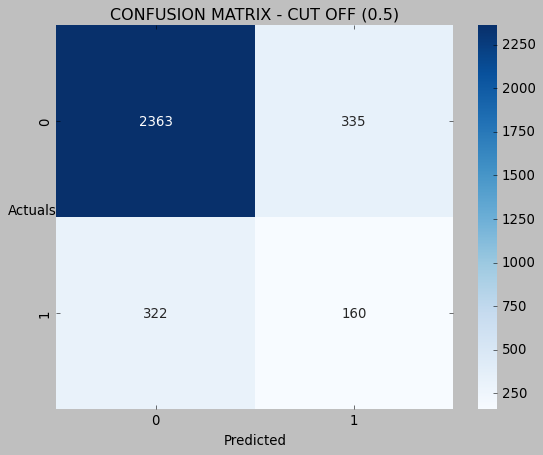

In [39]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [40]:
y_test_predict = NB.predict(X_test)

test_model_score = NB.score(X_test, y_test)

print(model_score)
print()
print(metrics.confusion_matrix(y_test_predict, y_test_predict))
print()
print(metrics.classification_report(y_test, y_test_predict))

0.7933962264150943

[[890   0]
 [  0 170]]

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       898
         1.0       0.33      0.35      0.34       162

    accuracy                           0.79      1060
   macro avg       0.61      0.61      0.61      1060
weighted avg       0.80      0.79      0.79      1060



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

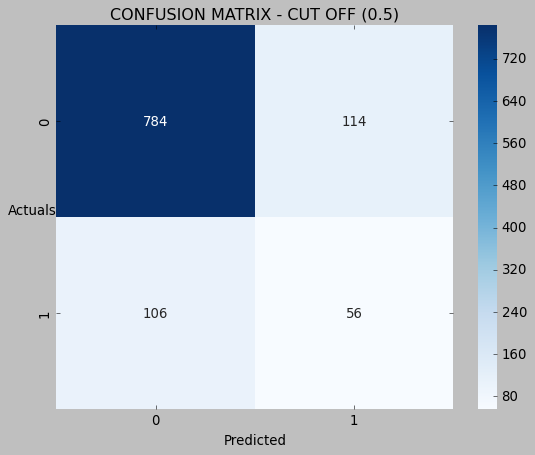

In [41]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [43]:
model_evaluation = model_evaluation.append({'Model':'NB','Train_Acc':79,'Test_Acc':79,'Train_Rec':33,'Test_Rec':35,
                                            'Train_Pre':32,'Test_Pre':33},ignore_index = True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [44]:
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre


### Decision Tree

In [61]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

1.0

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2698
         1.0       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

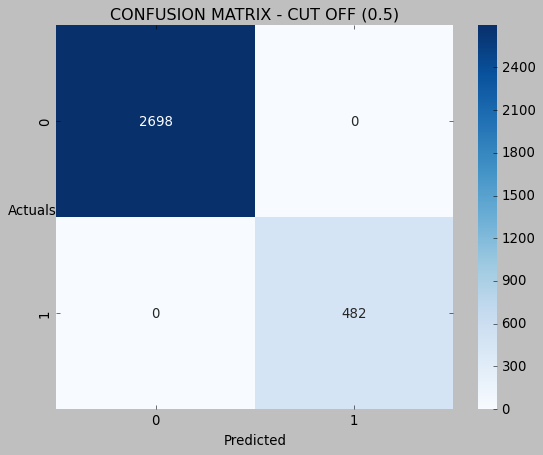

In [62]:
y_train_predict = DT_model.predict(X_train)

model_score = DT_model.score(X_train, y_train)

print(model_score)
print()
print(metrics.classification_report(y_train, y_train_predict))

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

0.7594339622641509

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       898
         1.0       0.19      0.17      0.18       162

    accuracy                           0.76      1060
   macro avg       0.52      0.52      0.52      1060
weighted avg       0.75      0.76      0.76      1060



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

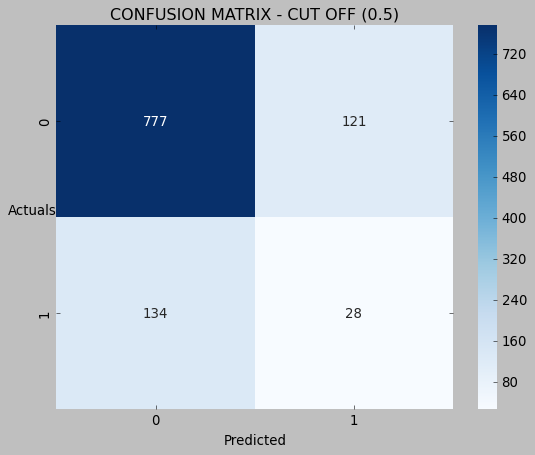

In [63]:
y_test_predict = DT_model.predict(X_test)

model_score = DT_model.score(X_test, y_test)

print(model_score)
print()
print(metrics.classification_report(y_test, y_test_predict))

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [64]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

1.0

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2698
         1.0       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

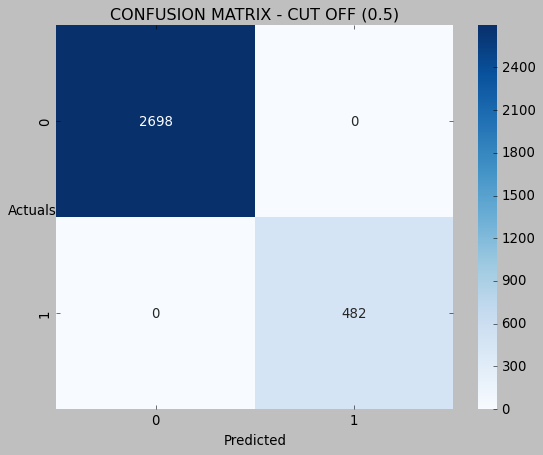

In [65]:
y_train_predict = RF_model.predict(X_train)

model_score = RF_model.score(X_train, y_train)

print(model_score)
print()
print(metrics.classification_report(y_train, y_train_predict))

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

0.8443396226415094

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       898
         1.0       0.40      0.04      0.07       162

    accuracy                           0.84      1060
   macro avg       0.63      0.51      0.49      1060
weighted avg       0.78      0.84      0.79      1060



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

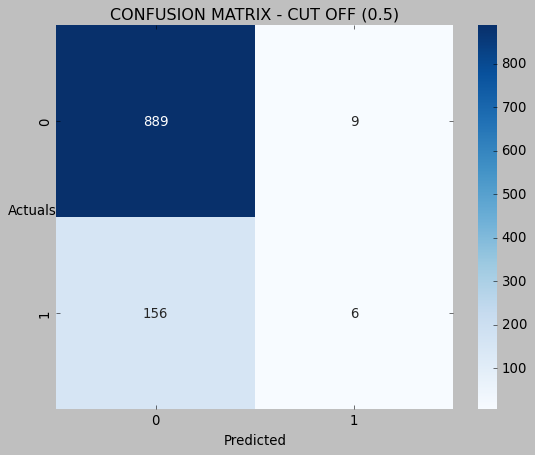

In [66]:
y_test_predict = RF_model.predict(X_test)

model_score = RF_model.score(X_test, y_test)

print(model_score)
print()
print(metrics.classification_report(y_test, y_test_predict))

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [67]:
new_data = pd.DataFrame([{'Model':'NB','Train_Acc':79,'Test_Acc':79,'Train_Rec':33,'Test_Rec':35,
                                            'Train_Pre':32,'Test_Pre':33}])

In [68]:
model_evaluation = pd.concat([model_evaluation,new_data],ignore_index=True)

In [69]:
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre
0,NB,79,79,33,35,32,33
1,DT,100,76,100,16,100,17
2,RF,100,84,100,4,100,40
3,NB,79,79,33,35,32,33


In [56]:
new_data = pd.DataFrame([{'Model':'DT','Train_Acc':100,'Test_Acc':76,'Train_Rec':100,'Test_Rec':16,
                                            'Train_Pre':100,'Test_Pre':17}])
model_evaluation = pd.concat([model_evaluation,new_data],ignore_index=True)
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre
0,NB,79,79,33,35,32,33
1,DT,100,76,100,16,100,17


In [58]:
new_data = pd.DataFrame([{'Model':'RF','Train_Acc':100,'Test_Acc':84,'Train_Rec':100,'Test_Rec':4,
                                            'Train_Pre':100,'Test_Pre':40}])
model_evaluation = pd.concat([model_evaluation,new_data],ignore_index=True)
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre
0,NB,79,79,33,35,32,33
1,DT,100,76,100,16,100,17
2,RF,100,84,100,4,100,40


## Logistic Regression

In [71]:
LR_model=LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

0.8474842767295597

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      2698
         1.0       0.42      0.02      0.03       482

    accuracy                           0.85      3180
   macro avg       0.64      0.51      0.47      3180
weighted avg       0.79      0.85      0.78      3180



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

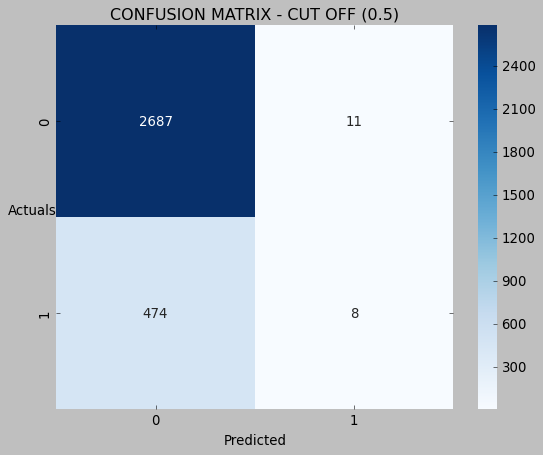

In [72]:
y_train_predict = LR_model.predict(X_train)

model_score = LR_model.score(X_train, y_train)

print(model_score)
print()
print(metrics.classification_report(y_train, y_train_predict))

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

0.8490566037735849

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       898
         1.0       0.75      0.02      0.04       162

    accuracy                           0.85      1060
   macro avg       0.80      0.51      0.48      1060
weighted avg       0.83      0.85      0.78      1060



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

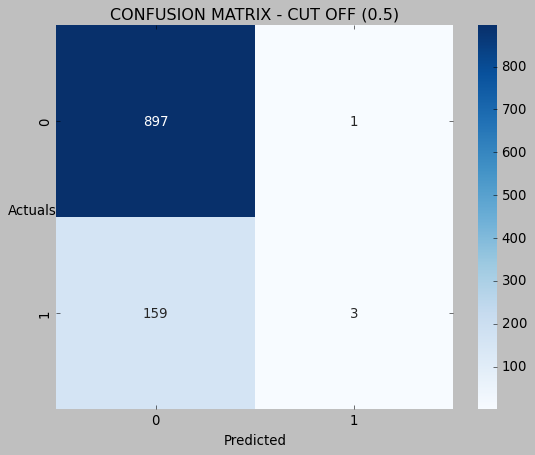

In [74]:
y_test_predict = LR_model.predict(X_test)

model_score = LR_model.score(X_test, y_test)

print(model_score)
print()
print(metrics.classification_report(y_test, y_test_predict))

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [75]:
new_data = pd.DataFrame([{'Model':'Logistic_Reg','Train_Acc':85,'Test_Acc':85,'Train_Rec':2,'Test_Rec':2,
                                            'Train_Pre':42,'Test_Pre':75}])
model_evaluation = pd.concat([model_evaluation,new_data],ignore_index=True)
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre
0,NB,79,79,33,35,32,33
1,DT,100,76,100,16,100,17
2,RF,100,84,100,4,100,40
3,NB,79,79,33,35,32,33
4,Logistic_Reg,85,85,2,2,42,75


## KNN

In [78]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

0.8666666666666667

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2698
         1.0       0.70      0.21      0.33       482

    accuracy                           0.87      3180
   macro avg       0.79      0.60      0.63      3180
weighted avg       0.85      0.87      0.84      3180



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

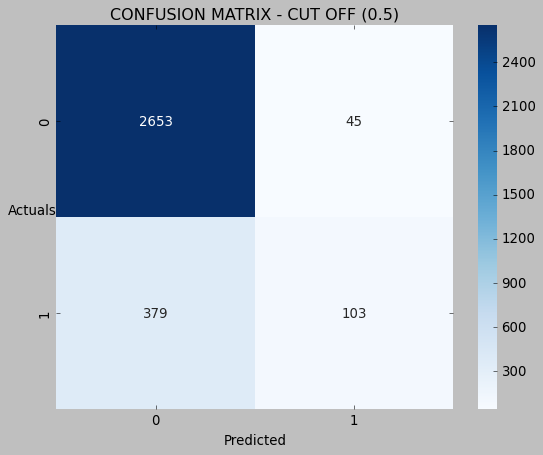

In [79]:
y_train_predict = KNN_model.predict(X_train)

model_score = KNN_model.score(X_train, y_train)

print(model_score)
print()
print(metrics.classification_report(y_train, y_train_predict))

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

0.8264150943396227

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90       898
         1.0       0.23      0.06      0.09       162

    accuracy                           0.83      1060
   macro avg       0.54      0.51      0.50      1060
weighted avg       0.75      0.83      0.78      1060



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

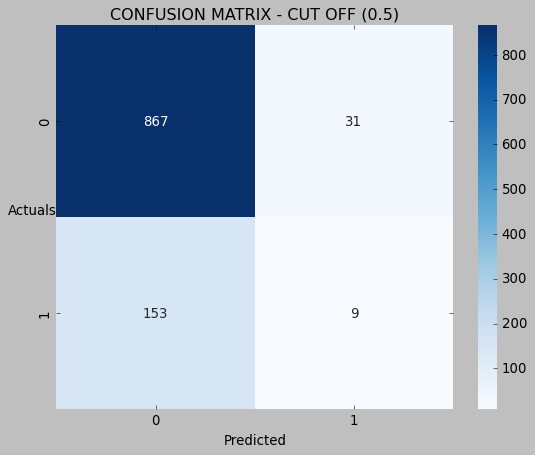

In [80]:
y_test_predict = KNN_model.predict(X_test)

model_score = KNN_model.score(X_test, y_test)

print(model_score)
print()
print(metrics.classification_report(y_test, y_test_predict))

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [81]:
new_data = pd.DataFrame([{'Model':'KNN','Train_Acc':87,'Test_Acc':83,'Train_Rec':21,'Test_Rec':6,
                                            'Train_Pre':70,'Test_Pre':23}])
model_evaluation = pd.concat([model_evaluation,new_data],ignore_index=True)
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre
0,NB,79,79,33,35,32,33
1,DT,100,76,100,16,100,17
2,RF,100,84,100,4,100,40
3,NB,79,79,33,35,32,33
4,Logistic_Reg,85,85,2,2,42,75
5,KNN,87,83,21,6,70,23


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [93]:
X_train_Sca = pd.DataFrame(data=X_train_Sca,columns=X_train.columns)

In [96]:
X_test_Sca = pd.DataFrame(data=scaler.fit_transform(X_test),columns=X_test.columns)

In [97]:
X_test_Sca

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,tot_cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose
0,1.131195,-1.554431,0.309820,-0.992481,-0.758278,0.0,0.0,1.442704,0.0,-1.270194,0.613070,1.652632,1.348268,-0.291712,-0.757932
1,1.131195,-1.201252,-0.768699,1.007576,0.970902,0.0,0.0,-0.693143,0.0,1.110342,-0.600350,-0.491155,0.665639,1.685419,-0.137050
2,-0.877292,-0.612621,-0.768699,1.007576,0.970902,0.0,0.0,1.442704,0.0,0.763662,1.705147,0.821368,-1.192483,0.825797,-0.275024
3,1.131195,-1.672157,-0.768699,1.007576,0.970902,0.0,0.0,-0.693143,0.0,-0.137706,-0.503276,-0.928662,-0.797138,-0.291712,0.828768
4,-0.877292,-0.612621,1.388338,-0.992481,-0.758278,0.0,0.0,-0.693143,0.0,0.463206,-0.163519,0.865118,0.462695,-0.033825,-0.344011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,-0.877292,0.682368,0.309820,-0.992481,-0.758278,0.0,0.0,1.442704,0.0,-0.415050,0.370386,0.865118,0.520679,-0.033825,-0.757932
1056,1.131195,-1.201252,-0.768699,-0.992481,-0.758278,0.0,0.0,1.442704,0.0,-0.946626,-0.381934,1.390127,0.686724,0.653872,-0.550972
1057,1.131195,1.741904,0.309820,1.007576,0.797984,0.0,0.0,1.442704,0.0,-0.415050,1.947831,-0.709909,0.918660,0.516333,0.690794
1058,1.131195,0.800094,-1.847217,1.007576,0.970902,0.0,0.0,-0.693143,0.0,0.763662,-0.551813,-0.359903,-0.586287,1.685419,0.828768


## Running Models on Automation

In [100]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train_Sca)
    pred_test = model.predict(X_test_Sca)
    
    train_acc = model.score(X_train_Sca,y_train)
    test_acc = model.score(X_test_Sca,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [104]:
get_metrics_score(LR_model)

Accuracy on training set :  0.8474842767295597
Accuracy on test set :  0.8490566037735849
Recall on training set :  0.491701244813278
Recall on test set :  0.5432098765432098
Precision on training set :  0.2433264887063655
Precision on test set :  0.2558139534883721


[0.6911949685534591,
 0.6886792452830188,
 0.491701244813278,
 0.5432098765432098,
 0.2433264887063655,
 0.2558139534883721]

In [106]:
new_data = pd.DataFrame([{'Model':'Logistic_Reg_Sca','Train_Acc':84,'Test_Acc':84,'Train_Rec':49,'Test_Rec':54,
                                            'Train_Pre':24,'Test_Pre':25}])
model_evaluation = pd.concat([model_evaluation,new_data],ignore_index=True)
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre
0,NB,79,79,33,35,32,33
1,DT,100,76,100,16,100,17
2,RF,100,84,100,4,100,40
3,NB,79,79,33,35,32,33
4,Logistic_Reg,85,85,2,2,42,75
5,KNN,87,83,21,6,70,23
6,Logistic_Reg,84,84,49,54,24,25
7,Logistic_Reg_Sca,84,84,49,54,24,25


In [107]:
AB_model = AdaBoostClassifier()
AB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [108]:
get_metrics_score(AB_model)

Accuracy on training set :  0.8578616352201258
Accuracy on test set :  0.8424528301886792
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0


[0.8484276729559749, 0.8471698113207548, 0.0, 0.0, 0.0, 0.0]

In [109]:
AB_model_Sca = AB_model.fit(X_train_Sca,y_train)

In [110]:
get_metrics_score(AB_model_Sca)

Accuracy on training set :  0.15220125786163521
Accuracy on test set :  0.15377358490566037
Recall on training set :  0.11203319502074689
Recall on test set :  0.04938271604938271
Precision on training set :  0.6923076923076923
Precision on test set :  0.38095238095238093


[0.8578616352201258,
 0.8424528301886792,
 0.11203319502074689,
 0.04938271604938271,
 0.6923076923076923,
 0.38095238095238093]

In [111]:
## Ada Boost Classifier - Scaled

0.8578616352201258

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      2698
         1.0       0.69      0.11      0.19       482

    accuracy                           0.86      3180
   macro avg       0.78      0.55      0.56      3180
weighted avg       0.84      0.86      0.81      3180



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

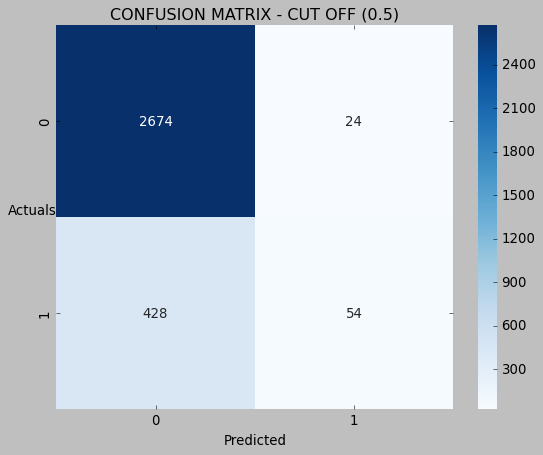

In [112]:
y_train_predict = AB_model_Sca.predict(X_train_Sca)

model_score = AB_model_Sca.score(X_train_Sca, y_train)

print(model_score)
print()
print(metrics.classification_report(y_train, y_train_predict))

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

0.8424528301886792

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       898
         1.0       0.38      0.05      0.09       162

    accuracy                           0.84      1060
   macro avg       0.62      0.52      0.50      1060
weighted avg       0.78      0.84      0.79      1060



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

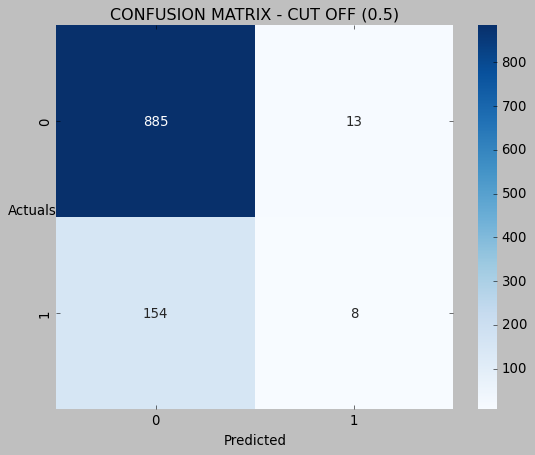

In [113]:
y_test_predict = AB_model_Sca.predict(X_test_Sca)

model_score = AB_model_Sca.score(X_test_Sca, y_test)

print(model_score)
print()
print(metrics.classification_report(y_test, y_test_predict))

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [114]:
## Gradient Boost - Sca

In [115]:
GB_model = GradientBoostingClassifier()
GB_model = GB_model.fit(X_train_Sca,y_train)

In [116]:
get_metrics_score(GB_model)

Accuracy on training set :  0.15157232704402515
Accuracy on test set :  0.15283018867924528
Recall on training set :  0.21369294605809128
Recall on test set :  0.05555555555555555
Precision on training set :  0.9279279279279279
Precision on test set :  0.36


[0.8783018867924528,
 0.840566037735849,
 0.21369294605809128,
 0.05555555555555555,
 0.9279279279279279,
 0.36]

In [124]:
new_data = pd.DataFrame([{'Model':'Bagging_Log_Reg','Train_Acc':15,'Test_Acc':15,'Train_Rec':5,'Test_Rec':3,
                                            'Train_Pre':78,'Test_Pre':71}])
model_evaluation = pd.concat([model_evaluation,new_data],ignore_index=True)
model_evaluation

,Model,Train_Acc,Test_Acc,Train_Rec,Test_Rec,Train_Pre,Test_Pre
0,NB,79,79,33,35,32,33
1,DT,100,76,100,16,100,17
2,RF,100,84,100,4,100,40
3,NB,79,79,33,35,32,33
4,Logistic_Reg,85,85,2,2,42,75
5,KNN,87,83,21,6,70,23
6,Logistic_Reg,84,84,49,54,24,25
7,Logistic_Reg_Sca,84,84,49,54,24,25
8,GB_Sca,15,15,21,5,92,36
9,AB_Sca,15,15,11,4,69,38


In [119]:
## Bagging

In [121]:
Bagging_model=BaggingClassifier(base_estimator=LR_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_Sca, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  random_state=1)

In [122]:
get_metrics_score(Bagging_model)

Accuracy on training set :  0.15157232704402515
Accuracy on test set :  0.15283018867924528
Recall on training set :  0.05394190871369295
Recall on test set :  0.030864197530864196
Precision on training set :  0.7878787878787878
Precision on test set :  0.7142857142857143


[0.8544025157232704,
 0.85,
 0.05394190871369295,
 0.030864197530864196,
 0.7878787878787878,
 0.7142857142857143]

0.85

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       898
         1.0       0.71      0.03      0.06       162

    accuracy                           0.85      1060
   macro avg       0.78      0.51      0.49      1060
weighted avg       0.83      0.85      0.79      1060



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

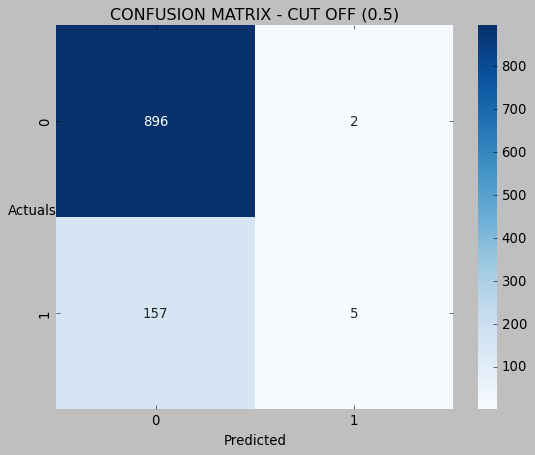

In [123]:
y_test_predict = Bagging_model.predict(X_test_Sca)

model_score = Bagging_model.score(X_test_Sca, y_test)

print(model_score)
print()
print(metrics.classification_report(y_test, y_test_predict))

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')